# Machine Learning Project 2 : Road segmentation using convolutional neural networks
#### By Anas Machraoui, Camil Hamdane and Nathan Girard

Welcome to our jupyter notebook for the Road Recognition challenge 2020. You will find here the code for training a model from scratch, represented with the tag [Training], allowing you to get the history of the training for loss plotting, and the code to load the weights from our best model, with the tag [Loading]. Either way, you will find some vizualisation of some predictions made by our model.

## [Training] Run this cell to train the model. (WARNING:Beware of computational time)

beginning training
Training shape =  (595, 400, 400, 3)
Epoch 1/200
64/64 [==============================] - ETA: 0s - loss: 0.6521 - binary_accuracy: 0.6127 - f1_m: 0.3557
Epoch 00001: val_loss improved from inf to 0.92802, saving model to ./checkpoints/new_model.h5
64/64 [==============================] - 33s 516ms/step - loss: 0.6521 - binary_accuracy: 0.6127 - f1_m: 0.3557 - val_loss: 0.9280 - val_binary_accuracy: 0.6260 - val_f1_m: 0.2570
Epoch 2/200
64/64 [==============================] - ETA: 0s - loss: 0.4802 - binary_accuracy: 0.8023 - f1_m: 0.4268
Epoch 00002: val_loss did not improve from 0.92802
64/64 [==============================] - 24s 380ms/step - loss: 0.4802 - binary_accuracy: 0.8023 - f1_m: 0.4268 - val_loss: 1.6369 - val_binary_accuracy: 0.7304 - val_f1_m: 0.2171
Epoch 3/200
64/64 [==============================] - ETA: 0s - loss: 0.3806 - binary_accuracy: 0.8564 - f1_m: 0.6204
Epoch 00003: val_loss improved from 0.92802 to 0.41854, saving model to ./checkpoints/n

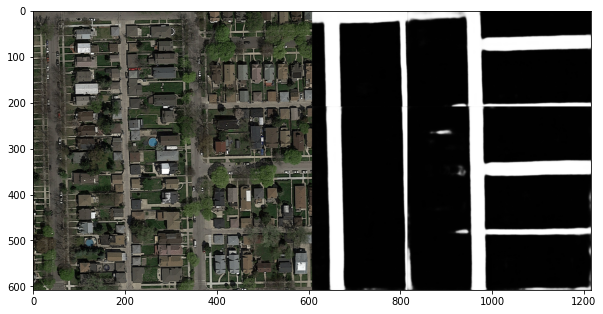

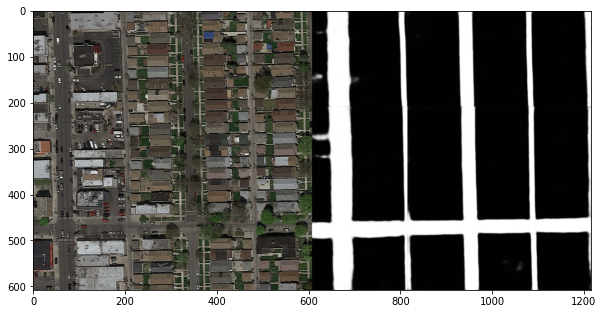

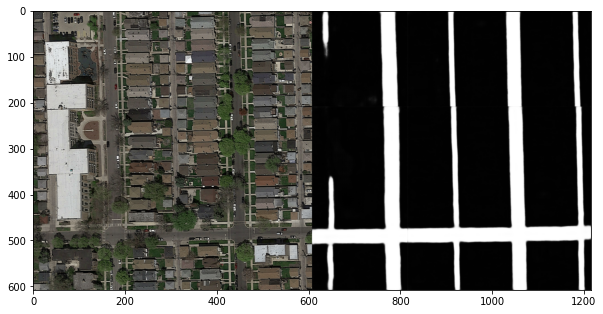

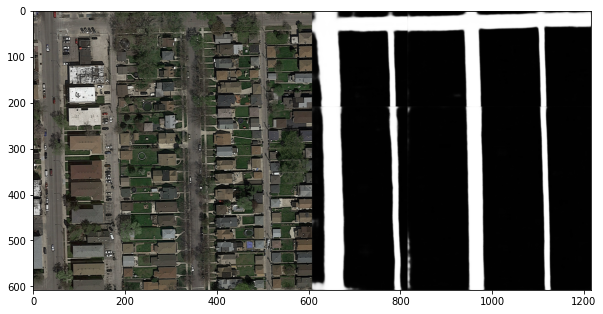

In [3]:
from run import *
model, history = run_(train = True)

## [Training] Load the image data

In [6]:
X_train,X_test,Y_train,Y_test = preprocess()
test_imgs = load_test_imgs(TEST_IMGS_PATH)

## [Training] Plot the loss function during training

dict_keys(['loss', 'binary_accuracy', 'f1_m', 'val_loss', 'val_binary_accuracy', 'val_f1_m', 'lr'])


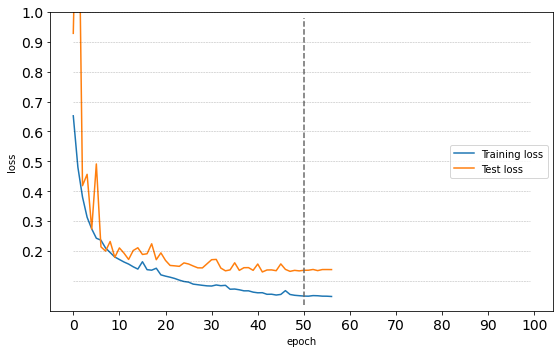

In [7]:
import matplotlib.pyplot as plt


print(history.history.keys())

ticklines = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# summarize history for loss
plt.figure(figsize=(9, 5.5))   
plt.plot(history.history['loss'][:100])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.axvline(x=50, ymin=0.02,ymax=0.98, ls='--', c='dimgrey')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Test loss'], loc='center right')

for y in ticklines:    
    plt.plot(range(0,100), [y] * len(range(0,100)), "--", lw=0.5, color="black", alpha=0.3)   

plt.yticks(ticklines[2:], fontsize=14)     
plt.xticks(range(0, 101, 10), fontsize=14) 
plt.ylim([0,1])
plt.savefig('loss_chart.png')
plt.show()

## [Loading] Load image data and weights from the U-net model.

### If you want to load the weights from the best model and avoid long computation time, you can get the h5 file [here](https://www.swisstransfer.com/d/ceeb0278-4381-4da6-bbd2-de0a027b3718), and put it in root/checkpoints/bestmodel.h5, otherwise you can just run the training.

In [ ]:
from run import *
import matplotlib.pyplot as plt
from proj2_helpers import predict
X_train,X_test,Y_train,Y_test = preprocess()
test_imgs = load_test_imgs(TEST_IMGS_PATH)
input_size = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
model = build_unet(input_size,
                            n_filters=N_FILTERS,
                            dropout_down=DROPOUT_DOWN,
                            dropout_up=DROPOUT_UP,
                            batch_norm=True,
                            activation_fct=ACTIV_FCT,
                            final_activation=FINAL_ACT,
                            kernel_size=KERNEL_SIZE,
                            dilate=DILATION)
model.load_weights('./checkpoints/bestmodel.h5')

## [Training & Loading] Make predictions and display some of them

In [9]:
from proj2_helpers import predict
imgs_preds = np.asarray(predict(test_imgs, model))

In [10]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def make_img_overlay(img, predicted_img):
    w = img.shape[0]
    h = img.shape[1]
    color_mask = np.zeros((w, h, 3), dtype=np.uint8)
    color_mask[:,:,0] = predicted_img*255

    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, 'RGB').convert("RGBA")
    overlay = Image.fromarray(color_mask, 'RGB').convert("RGBA")
    new_img = Image.blend(background, overlay, 0.2)
    return new_img

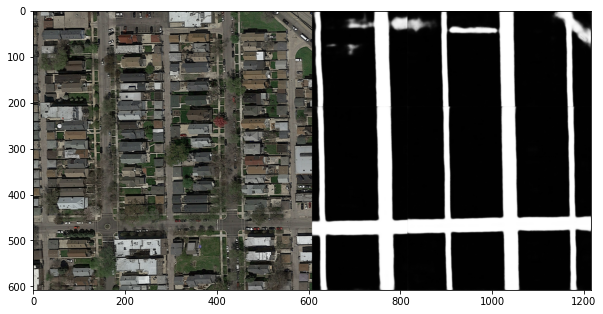

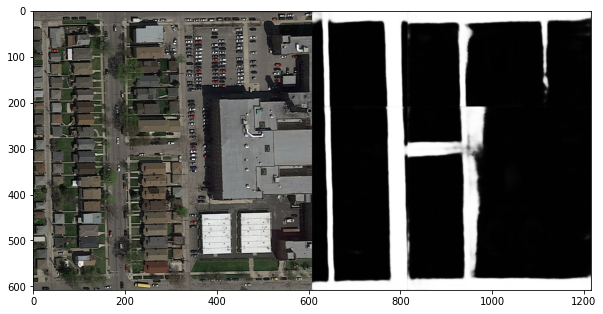

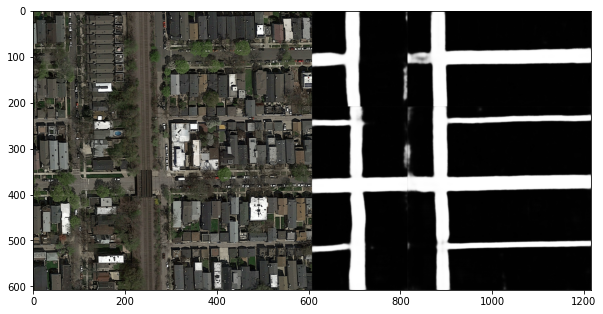

In [11]:
# Show random images and their groundtruth image
for i in np.random.randint(0,50,3):
    cimg = concatenate_images(test_imgs[i], imgs_preds[i][:,:,0])
    fig1 = plt.figure(figsize=(10, 10))
    plt.imshow(cimg, cmap='Greys_r')

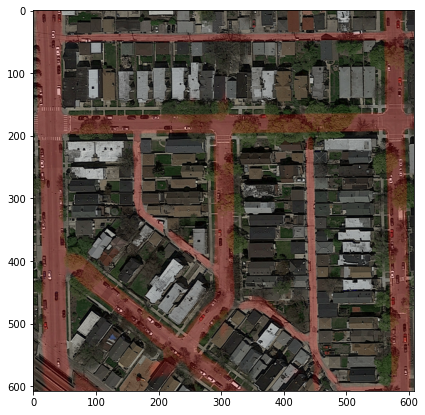

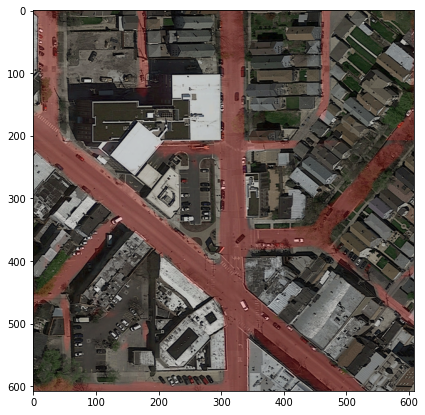

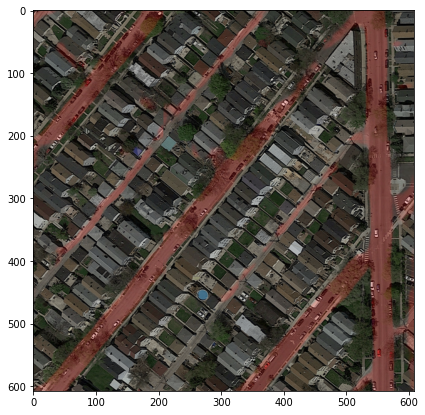

In [12]:
# Show a few random images with their prediction overlay.
for i in np.random.randint(0,50,3):
    img1 = np.squeeze(imgs_preds[i].copy())
    new_img = make_img_overlay(test_imgs[i], img1)
    fig1 = plt.figure(figsize=(7,7))
    plt.imshow(new_img, cmap='Greys_r')